In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the JSON file
with open('../datasets/EXTRACTED_FILINGS.json', 'r') as json_file:
    data = json.load(json_file)
extracted_filings = pd.DataFrame(data)

In [8]:
extracted_filings.shape

(7660, 6)

Text(0.5, 1.0, 'Distribution of Filings in Years')

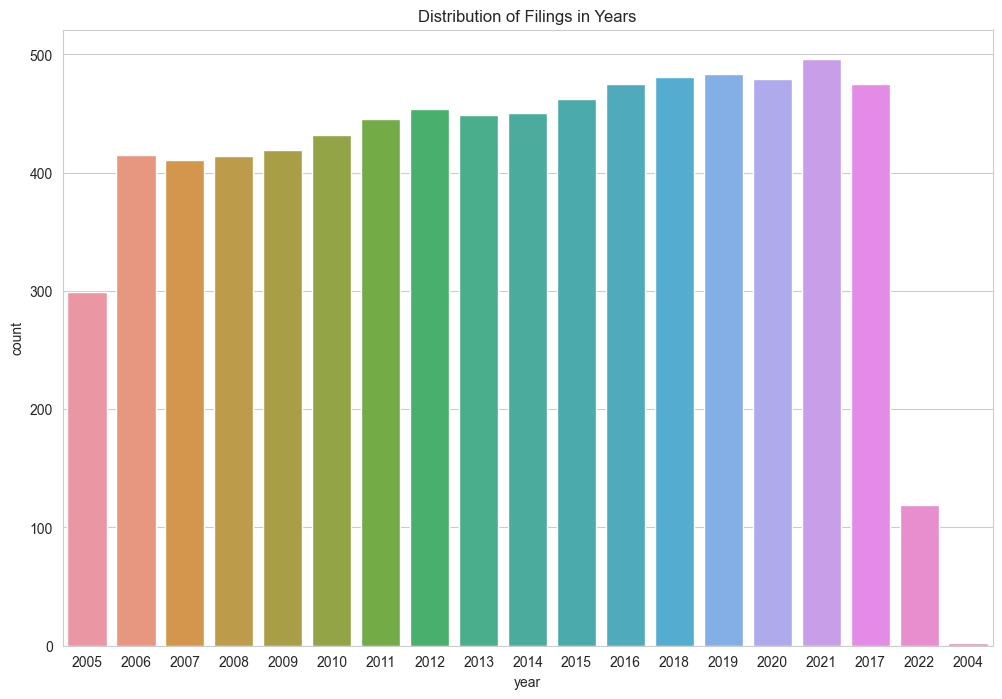

In [9]:
# Plot the distribution of filings in years
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=extracted_filings)
plt.title('Distribution of Filings in Years')

In [2]:
# Load the JSON file
with open('../datasets/EXTRACTED_FLS_METRICS.json', 'r') as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data)

In [3]:
df.head()

,Sentence,Metric,Item,Year,CIK,Company,FLS
0,"In the future, we may be unable to compete suc...",Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
1,The failure of manufacturers of products regul...,Revenue,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
2,An extended interruption in the supply of our ...,Revenue,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
3,Our revenues and profitability depend on our r...,Net Income,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS
4,Our revenues and profitability depend on our r...,Revenue,item_1A,2015,1000228,HENRY SCHEIN INC,Non-FLS


In [5]:
df['CIK'].value_counts()

1137774    3842
1099219    3724
874766     3041
936468     2457
899051     2310
           ... 
1841666      20
1868275      14
36104        13
1390777       3
106535        2
Name: CIK, Length: 491, dtype: int64

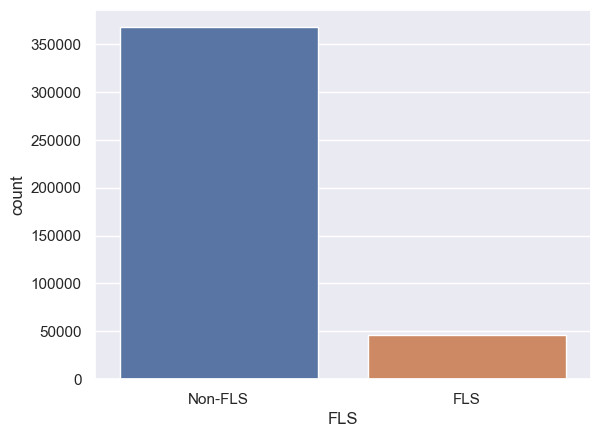

In [6]:
# draw a graph to show the distribution of FLS and non-FLS per item
sns.set(style="darkgrid")
ax = sns.countplot(x="FLS", data=df)
plt.show()


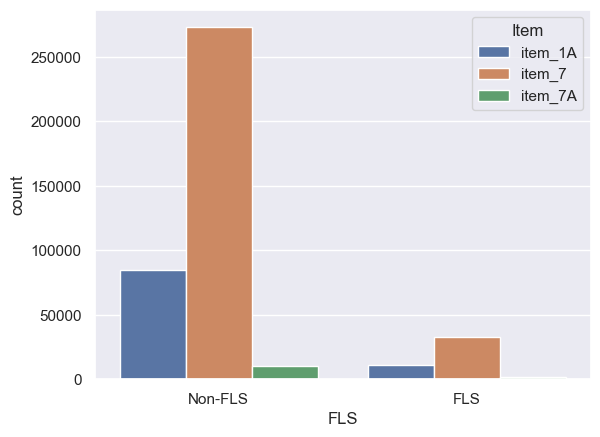

In [14]:
# draw graph to show FLS per item
df_fls = df[df['FLS'] == 'FLS']
sns.set(style="darkgrid")
ax = sns.countplot(x="FLS", hue="Item", data=df)
plt.show()

In [19]:
# count number of FLS per item
df_fls = df[df['FLS'] == 'FLS'] 
df_fls[['Item','FLS']].groupby('Item').count()

,FLS
Item,
item_1A,11036
item_7,32832
item_7A,1847
